In [107]:
import pandas as pd 
import numpy as np

In [108]:
data=pd.read_csv('train1.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [109]:
#Delete cols
data=data.drop(['casual', 'registered'],axis=1)

In [110]:
df=data.copy()

In [111]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


# Spliting the data into a train set and validation set

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
train_set, val_set= train_test_split(df, test_size=0.2, random_state=0)

# Perform EDA on Train data

1-Quantify missing data


In [114]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 3662 to 2732
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   count       8708 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 748.3+ KB


Check missing data

In [115]:
train_set.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

Check numerical and categorical variables

In [116]:
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object


In [117]:
print(df.nunique())

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
dtype: int64


In [118]:
train_set.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,257
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,865
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,96
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,311
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,2


In [119]:
train_set.shape

(8708, 10)

Summary statistics

In [120]:
train_set.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.496899,0.029513,0.679835,1.413413,20.151585,23.566106,61.778824,12.848368,190.855535
std,1.118607,0.169249,0.466567,0.628714,7.772519,8.461146,19.201010,8.242156,180.852259
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.750000,7.001500,43.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [121]:
train_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,257
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,865
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,96
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,311
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,2
...,...,...,...,...,...,...,...,...,...,...
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,153
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,188
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,617
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,132


# Data visualization

Check the distribution of the  (count)

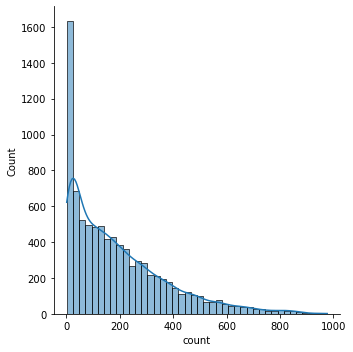

In [122]:
import seaborn as sns
sns.displot(train_set['count'],kde=True)

<AxesSubplot:>

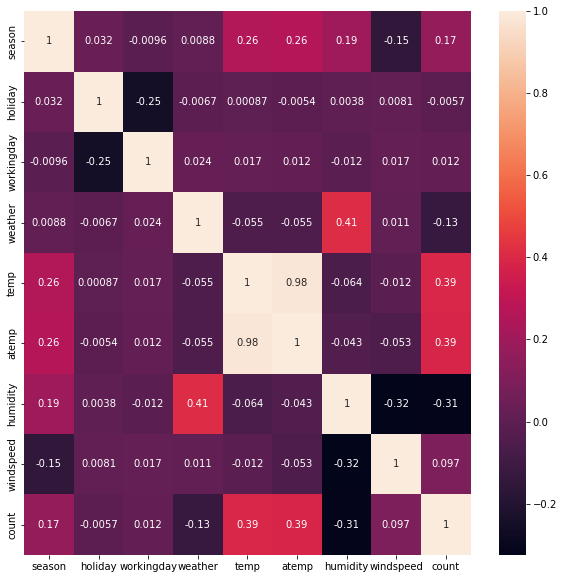

In [123]:
#Check correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(),annot=True)

<AxesSubplot:xlabel='atemp', ylabel='count'>

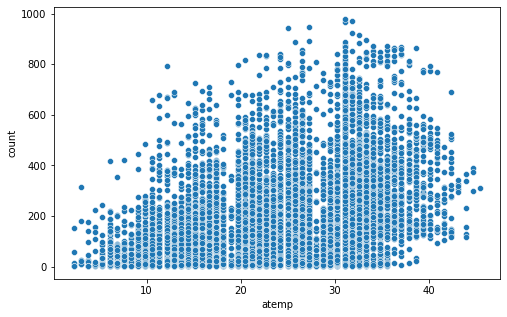

In [124]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train_set,x='atemp',y='count')

C:\Users\najat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

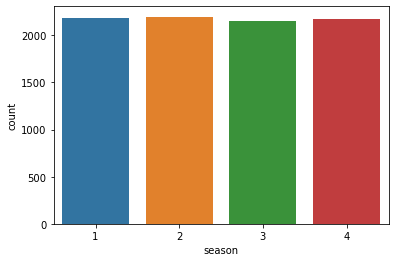

In [125]:
sns.countplot(train_set['season'])

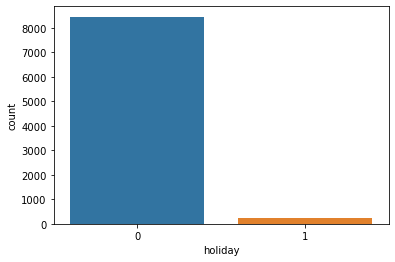

In [126]:
sns.countplot(data=train_set, x='holiday')
plt.show()

<AxesSubplot:xlabel='workingday', ylabel='count'>

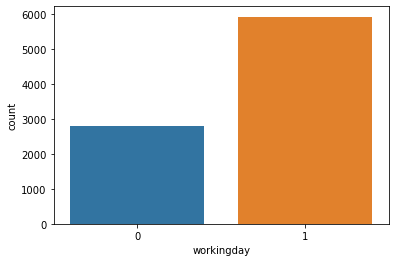

In [127]:
sns.countplot(data=train_set,x='workingday')

<AxesSubplot:xlabel='weather', ylabel='count'>

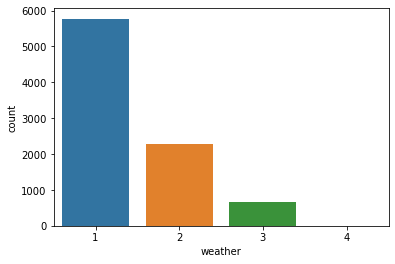

In [128]:
sns.countplot(data=train_set, x='weather')


Check Outliers

In [129]:
train_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,257
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,865
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,96
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,311
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,2
...,...,...,...,...,...,...,...,...,...,...
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,153
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,188
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,617
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,132


<AxesSubplot:xlabel='season'>

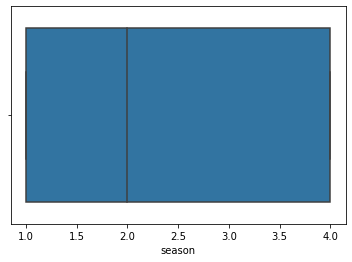

In [130]:
sns.boxplot(x=train_set["season"])

<AxesSubplot:ylabel='count'>

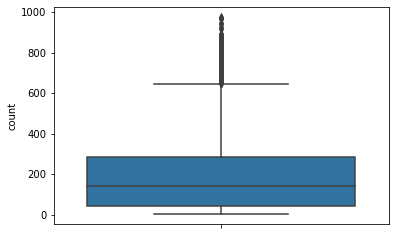

In [131]:
sns.boxplot(data=train_set,y="count")

<AxesSubplot:xlabel='season', ylabel='count'>

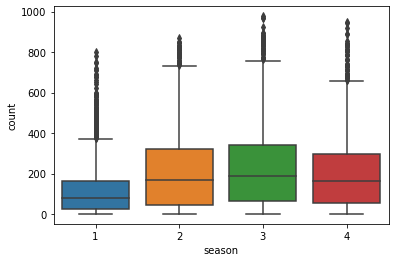

In [132]:
sns.boxplot(data=train_set,y="count",x="season")

<AxesSubplot:xlabel='weather'>

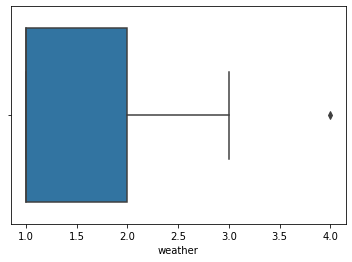

In [133]:
sns.boxplot(x=train_set["weather"])

<AxesSubplot:xlabel='humidity'>

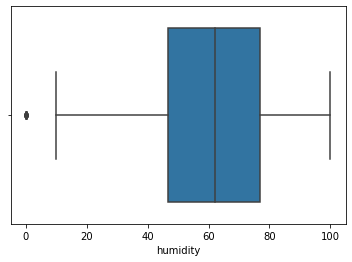

In [134]:
sns.boxplot(x=train_set["humidity"])

<AxesSubplot:xlabel='holiday'>

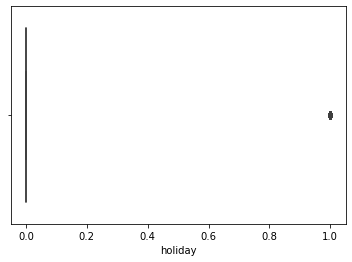

In [135]:
sns.boxplot(x=train_set["holiday"])

 Hypothesis

In [136]:
# Null hypothesis: There is no significant relationship between humidity and count
# Alternative hypothesis: There is a significant relationship between humidity and count
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(train_set['humidity'],train_set['count'])

#print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -66.22914929262973
p-value: 0.0


In [137]:
# Null hypothesis: There is no significant relationship between humidity and count
# Alternative hypothesis: There is a significant relationship between temp and count
t_statistic, p_value = ttest_ind(train_set['temp'],train_set['count'])

#print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -87.9990807542181
p-value: 0.0


In [138]:
# Null hypothesis: There is no significant relationship between humidity and count
# Alternative hypothesis: There is a significant relationship between windspeed and count
t_statistic, p_value = ttest_ind(train_set['windspeed'],train_set['count'])

#print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -91.7534108223182
p-value: 0.0


we can conclude that (temp ), (humidity)and (windspeed) is a significant predictor of count, and should be included in the regression model to improve its accuracy.

# Data preparation 

In [139]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [140]:
test_set= pd.read_csv('test1.csv')

In [141]:
test_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [142]:
# Apply logarithmic transformation to 'count' variable
train_set['count'] = train_set['count'].apply(np.log)

C:\Users\najat\AppData\Local\Temp/ipykernel_12348/2039237880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['count'] = train_set['count'].apply(np.log)


In [143]:
val_set['count'] = val_set['count'].apply(np.log)

C:\Users\najat\AppData\Local\Temp/ipykernel_12348/3651245731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set['count'] = val_set['count'].apply(np.log)


Return  outliers

In [144]:
#train_set
from scipy.stats import zscore
train_set = train_set[abs(zscore(train_set['count']))<3]

In [145]:
val_set = val_set[abs(zscore(val_set['count']))<3]

<AxesSubplot:xlabel='count'>

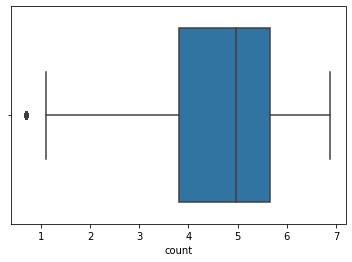

In [146]:
sns.boxplot(x=train_set["count"])

In [147]:
#train_set
from scipy.stats import zscore
train_set = train_set[abs(zscore(train_set['humidity']))<3]

In [148]:
val_set = val_set[abs(zscore(val_set['humidity']))<3]

In [149]:
test_set = test_set[abs(zscore(test_set['humidity']))<3]

<AxesSubplot:xlabel='humidity'>

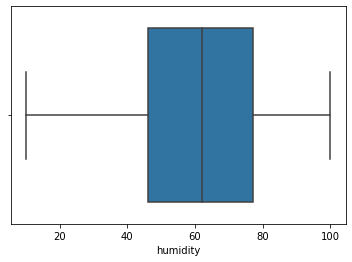

In [150]:
sns.boxplot(x=train_set["humidity"])

In [151]:
train_set = train_set[abs(zscore(train_set['holiday']))<3]

In [152]:
val_set = val_set[abs(zscore(val_set['holiday']))<3]

In [153]:
test_set = test_set[abs(zscore(test_set['holiday']))<3]

<AxesSubplot:xlabel='holiday'>

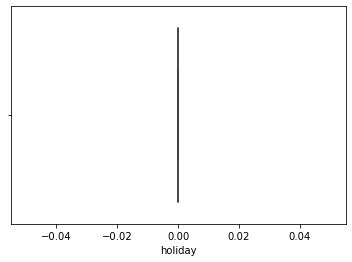

In [154]:
sns.boxplot(x=train_set["holiday"])

In [155]:
train_set = train_set[abs(zscore(train_set['weather']))<3]

In [156]:
from scipy.stats import zscore
val_set = val_set[abs(zscore(val_set['weather']))<3]

In [157]:
test_set = test_set[abs(zscore(test_set['weather']))<3]

<AxesSubplot:xlabel='weather'>

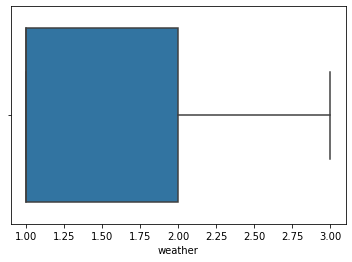

In [158]:
sns.boxplot(x=train_set["weather"])

Convert Datetime column to date formate


In [159]:
train_set['datetime'] = pd.to_datetime(train_set['datetime'])
train_set.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
dtype: object

In [160]:
val_set['datetime']=pd.to_datetime(val_set['datetime'])
val_set.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
dtype: object

In [161]:
test_set['datetime']=pd.to_datetime(test_set['datetime'])
test_set.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [162]:
train_set.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,5.549076
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,6.762730
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,4.564348
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,5.739793
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0.693147


Extract dayes,months and yeares from datetime

In [163]:
#From train set
train_set['day'] = train_set['datetime'].dt.day
train_set['month']=train_set['datetime'].dt.month
train_set['year']=train_set['datetime'].dt.year
train_set['hour']=train_set['datetime'].dt.hour
train_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,5.549076,3,9,2011,12
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,6.762730,2,8,2012,17
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,4.564348,12,4,2012,6
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,5.739793,19,6,2011,19
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0.693147,3,2,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,5.030438,15,11,2011,13
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,5.236442,5,8,2011,22
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,6.424869,14,10,2012,14
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,4.882802,16,12,2012,9


In [164]:
#val set
val_set['day'] = val_set['datetime'].dt.day
val_set['month']=val_set['datetime'].dt.month
val_set['year']=val_set['datetime'].dt.year
val_set['hour']=val_set['datetime'].dt.hour
val_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,5.497168,13,3,2012,21
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,5.476464,12,6,2012,16
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,5.433722,2,2,2012,16
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,6.146329,15,6,2012,19
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,5.814131,1,2,2012,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2012-12-17 19:00:00,4,0,1,2,17.22,21.210,88,8.9981,5.828946,17,12,2012,19
5519,2012-01-05 02:00:00,1,0,1,1,8.20,11.365,51,6.0032,1.386294,5,1,2012,2
8217,2012-07-03 18:00:00,3,0,1,2,35.26,37.120,30,0.0000,6.440947,3,7,2012,18
5916,2012-02-02 17:00:00,1,0,1,1,17.22,21.210,54,32.9975,6.109248,2,2,2012,17


In [165]:
#test_set
test_set['day'] = test_set['datetime'].dt.day
test_set['month']=test_set['datetime'].dt.month
test_set['year']=test_set['datetime'].dt.year
test_set['hour']=test_set['datetime'].dt.hour
test_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,year,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,1,2011,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,2011,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,31,12,2012,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,31,12,2012,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,31,12,2012,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,31,12,2012,22


drop datetime column

In [166]:
train_set=train_set.drop('datetime',axis=1)


In [167]:
train_set

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour
3662,3,0,0,1,28.70,32.575,61,15.0013,5.549076,3,9,2011,12
8648,3,0,1,1,33.62,38.635,52,16.9979,6.762730,2,8,2012,17
7053,2,0,1,1,12.30,14.395,65,16.9979,4.564348,12,4,2012,6
2685,2,0,0,1,29.52,34.090,62,8.9981,5.739793,19,6,2011,19
5927,1,0,1,1,10.66,12.880,60,15.0013,0.693147,3,2,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4,0,1,3,22.14,25.760,60,15.0013,5.030438,15,11,2011,13
3264,3,0,1,1,28.70,32.575,65,15.0013,5.236442,5,8,2011,22
9845,4,0,0,1,27.06,31.060,39,27.9993,6.424869,14,10,2012,14
10799,4,0,0,2,14.76,17.425,87,8.9981,4.882802,16,12,2012,9


In [168]:
val_set=val_set.drop('datetime',axis=1)


In [169]:
val_set

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour
6638,1,0,1,1,23.78,27.275,56,7.0015,5.497168,13,3,2012,21
7975,2,0,1,2,27.06,29.545,89,19.0012,5.476464,12,6,2012,16
5915,1,0,1,1,18.86,22.725,55,19.0012,5.433722,2,2,2012,16
8050,2,0,1,1,28.70,31.820,42,11.0014,6.146329,15,6,2012,19
5894,1,0,1,1,22.14,25.760,52,19.0012,5.814131,1,2,2012,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4,0,1,2,17.22,21.210,88,8.9981,5.828946,17,12,2012,19
5519,1,0,1,1,8.20,11.365,51,6.0032,1.386294,5,1,2012,2
8217,3,0,1,2,35.26,37.120,30,0.0000,6.440947,3,7,2012,18
5916,1,0,1,1,17.22,21.210,54,32.9975,6.109248,2,2,2012,17


In [170]:
test_set=test_set.drop('datetime',axis=1)

In [171]:
test_set

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,year,hour
0,1,0,1,1,10.66,11.365,56,26.0027,20,1,2011,0
1,1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,1
2,1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,2
3,1,0,1,1,10.66,12.880,56,11.0014,20,1,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,20,1,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,31,12,2012,19
6489,1,0,1,2,10.66,12.880,60,11.0014,31,12,2012,20
6490,1,0,1,1,10.66,12.880,60,11.0014,31,12,2012,21
6491,1,0,1,1,10.66,13.635,56,8.9981,31,12,2012,22


Convert the categorical columns to the one hot encoding

In [172]:
train_set = pd.get_dummies(train_set, columns=['season'])


In [173]:
train_set

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour,season_1,season_2,season_3,season_4
3662,0,0,1,28.70,32.575,61,15.0013,5.549076,3,9,2011,12,0,0,1,0
8648,0,1,1,33.62,38.635,52,16.9979,6.762730,2,8,2012,17,0,0,1,0
7053,0,1,1,12.30,14.395,65,16.9979,4.564348,12,4,2012,6,0,1,0,0
2685,0,0,1,29.52,34.090,62,8.9981,5.739793,19,6,2011,19,0,1,0,0
5927,0,1,1,10.66,12.880,60,15.0013,0.693147,3,2,2012,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,1,3,22.14,25.760,60,15.0013,5.030438,15,11,2011,13,0,0,0,1
3264,0,1,1,28.70,32.575,65,15.0013,5.236442,5,8,2011,22,0,0,1,0
9845,0,0,1,27.06,31.060,39,27.9993,6.424869,14,10,2012,14,0,0,0,1
10799,0,0,2,14.76,17.425,87,8.9981,4.882802,16,12,2012,9,0,0,0,1


In [174]:
val_set = pd.get_dummies(val_set, columns=['season'])

In [175]:
test_set = pd.get_dummies(test_set, columns=['season'])

Rename cols in train set 

In [176]:
train_set= train_set.rename(columns={'season_1':'Spring', 'season_2':'Summer', 'season_3':'Fall', 'season_4':'Winter'})
train_set

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour,Spring,Summer,Fall,Winter
3662,0,0,1,28.70,32.575,61,15.0013,5.549076,3,9,2011,12,0,0,1,0
8648,0,1,1,33.62,38.635,52,16.9979,6.762730,2,8,2012,17,0,0,1,0
7053,0,1,1,12.30,14.395,65,16.9979,4.564348,12,4,2012,6,0,1,0,0
2685,0,0,1,29.52,34.090,62,8.9981,5.739793,19,6,2011,19,0,1,0,0
5927,0,1,1,10.66,12.880,60,15.0013,0.693147,3,2,2012,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,1,3,22.14,25.760,60,15.0013,5.030438,15,11,2011,13,0,0,0,1
3264,0,1,1,28.70,32.575,65,15.0013,5.236442,5,8,2011,22,0,0,1,0
9845,0,0,1,27.06,31.060,39,27.9993,6.424869,14,10,2012,14,0,0,0,1
10799,0,0,2,14.76,17.425,87,8.9981,4.882802,16,12,2012,9,0,0,0,1


Rename cols in val set

In [177]:
val_set= val_set.rename(columns={'season_1':'Spring', 'season_2':'Summer', 'season_3':'Fall', 'season_4':'Winter'})
val_set

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour,Spring,Summer,Fall,Winter
6638,0,1,1,23.78,27.275,56,7.0015,5.497168,13,3,2012,21,1,0,0,0
7975,0,1,2,27.06,29.545,89,19.0012,5.476464,12,6,2012,16,0,1,0,0
5915,0,1,1,18.86,22.725,55,19.0012,5.433722,2,2,2012,16,1,0,0,0
8050,0,1,1,28.70,31.820,42,11.0014,6.146329,15,6,2012,19,0,1,0,0
5894,0,1,1,22.14,25.760,52,19.0012,5.814131,1,2,2012,19,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,0,1,2,17.22,21.210,88,8.9981,5.828946,17,12,2012,19,0,0,0,1
5519,0,1,1,8.20,11.365,51,6.0032,1.386294,5,1,2012,2,1,0,0,0
8217,0,1,2,35.26,37.120,30,0.0000,6.440947,3,7,2012,18,0,0,1,0
5916,0,1,1,17.22,21.210,54,32.9975,6.109248,2,2,2012,17,1,0,0,0


Rename Test set

In [178]:
test_set= test_set.rename(columns={'season_1':'Spring', 'season_2':'Summer', 'season_3':'Fall', 'season_4':'Winter'})
test_set

,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,year,hour,Spring,Summer,Fall,Winter
0,0,1,1,10.66,11.365,56,26.0027,20,1,2011,0,1,0,0,0
1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,1,1,0,0,0
2,0,1,1,10.66,13.635,56,0.0000,20,1,2011,2,1,0,0,0
3,0,1,1,10.66,12.880,56,11.0014,20,1,2011,3,1,0,0,0
4,0,1,1,10.66,12.880,56,11.0014,20,1,2011,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,2,10.66,12.880,60,11.0014,31,12,2012,19,1,0,0,0
6489,0,1,2,10.66,12.880,60,11.0014,31,12,2012,20,1,0,0,0
6490,0,1,1,10.66,12.880,60,11.0014,31,12,2012,21,1,0,0,0
6491,0,1,1,10.66,13.635,56,8.9981,31,12,2012,22,1,0,0,0


In [179]:
train_set = pd.get_dummies(train_set, columns=['day'])
val_set = pd.get_dummies(val_set, columns=['day'])
test_set = pd.get_dummies(test_set, columns=['day'])

In [180]:
train_set = pd.get_dummies(train_set, columns=['month'])
val_set = pd.get_dummies(val_set, columns=['month'])
test_set = pd.get_dummies(test_set, columns=['month'])


In [181]:
train_set = pd.get_dummies(train_set, columns=['year'])
val_set = pd.get_dummies(val_set, columns=['year'])
test_set = pd.get_dummies(test_set, columns=['year'])

In [182]:
#there is a larg correlation between atem and temp variables ,so will delete atemp
train_set=train_set.drop('atemp',axis=1)

In [183]:
train_set

,holiday,workingday,weather,temp,humidity,windspeed,count,hour,Spring,Summer,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
3662,0,0,1,28.70,61,15.0013,5.549076,12,0,0,...,0,0,0,0,1,0,0,0,1,0
8648,0,1,1,33.62,52,16.9979,6.762730,17,0,0,...,0,0,0,1,0,0,0,0,0,1
7053,0,1,1,12.30,65,16.9979,4.564348,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2685,0,0,1,29.52,62,8.9981,5.739793,19,0,1,...,0,1,0,0,0,0,0,0,1,0
5927,0,1,1,10.66,60,15.0013,0.693147,4,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,1,3,22.14,60,15.0013,5.030438,13,0,0,...,0,0,0,0,0,0,1,0,1,0
3264,0,1,1,28.70,65,15.0013,5.236442,22,0,0,...,0,0,0,1,0,0,0,0,1,0
9845,0,0,1,27.06,39,27.9993,6.424869,14,0,0,...,0,0,0,0,0,1,0,0,0,1
10799,0,0,2,14.76,87,8.9981,4.882802,9,0,0,...,0,0,0,0,0,0,0,1,0,1


In [184]:

val_set=val_set.drop('atemp',axis=1)

In [185]:
test_set=test_set.drop('atemp',axis=1)

In [186]:

# Scale the numerical columns using the 'fit_transform' method of the scaler object
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply feature scaling to the humidity and windspeed variables
train_set[['humidity', 'windspeed']] = scaler.fit_transform(train_set[['humidity', 'windspeed']])

In [187]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply feature scaling to the humidity and windspeed variables
val_set[['humidity', 'windspeed']] = scaler.fit_transform(val_set[['humidity', 'windspeed']])

In [188]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply feature scaling to the humidity and windspeed variables
test_set[['humidity', 'windspeed']] = scaler.fit_transform(test_set[['humidity', 'windspeed']])

#  Define the features and target variable


In [189]:
X_train = train_set.drop('count', axis=1)
y_train = train_set['count']
X_val = val_set.drop('count', axis=1)
y_val = val_set['count']


In [190]:
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.score(X_train,y_train)*100)
lr_pred = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
print("Linear Regression RMSE:", lr_rmse)


48.36979070785764
Linear Regression RMSE: 1.0281042091649721


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Calculate the R-squared score of the model on the training data
train_score = lr_model.score(X_train, y_train)
print("Training R-squared score:", train_score*100)

# Make predictions on the validation data using the trained model
lr_pred = lr_model.predict(X_val)

# Calculate the RMSE of the Linear Regression model on the validation data
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
print("Linear Regression RMSE:", lr_rmse)

Training R-squared score: 48.36979070785764
Linear Regression RMSE: 1.0281042091649721


In [192]:
# Fit a Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred= dt_model.predict(X_val)
dt_rmse = np.sqrt(mean_squared_error(y_val, dt_pred))
print(dt_model.score(X_train,y_train)*100)
print("Decision Tree Regression RMSE:", dt_rmse)

100.0
Decision Tree Regression RMSE: 0.44986595583875433


In [193]:
dt_model.score(X_val,y_val )*100

90.12598914606136

In [194]:
from sklearn.ensemble import RandomForestRegressor
# Fit a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print("Random Forest Regression RMSE:", rf_rmse)
print(rf_model.score(X_train,y_train)*100)

Random Forest Regression RMSE: 0.33714701638857597
99.27208382547778


In [195]:
rf_model.score(X_val,y_val )*100

94.4541772573013

In [196]:
val_set

,holiday,workingday,weather,temp,humidity,windspeed,count,hour,Spring,Summer,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
6638,0,1,1,23.78,-0.343270,-0.704626,5.497168,21,1,0,...,0,0,0,0,0,0,0,0,0,1
7975,0,1,2,27.06,1.383540,0.825784,5.476464,16,0,1,...,0,1,0,0,0,0,0,0,0,1
5915,0,1,1,18.86,-0.395597,0.825784,5.433722,16,1,0,...,0,0,0,0,0,0,0,0,0,1
8050,0,1,1,28.70,-1.075856,-0.194489,6.146329,19,0,1,...,0,1,0,0,0,0,0,0,0,1
5894,0,1,1,22.14,-0.552580,0.825784,5.814131,19,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,0,1,2,17.22,1.331213,-0.449985,5.828946,19,0,0,...,0,0,0,0,0,0,0,1,0,1
5519,0,1,1,8.20,-0.604908,-0.831946,1.386294,2,1,0,...,0,0,0,0,0,0,0,0,0,1
8217,0,1,2,35.26,-1.703787,-1.597578,6.440947,18,0,0,...,0,0,1,0,0,0,0,0,0,1
5916,0,1,1,17.22,-0.447925,2.610836,6.109248,17,1,0,...,0,0,0,0,0,0,0,0,0,1


In [197]:
train_set

,holiday,workingday,weather,temp,humidity,windspeed,count,hour,Spring,Summer,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
3662,0,0,1,28.70,-0.042454,0.264704,5.549076,12,0,0,...,0,0,0,0,1,0,0,0,1,0
8648,0,1,1,33.62,-0.513188,0.507765,6.762730,17,0,0,...,0,0,0,1,0,0,0,0,0,1
7053,0,1,1,12.30,0.166761,0.507765,4.564348,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2685,0,0,1,29.52,0.009850,-0.466113,5.739793,19,0,1,...,0,1,0,0,0,0,0,0,1,0
5927,0,1,1,10.66,-0.094758,0.264704,0.693147,4,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,1,3,22.14,-0.094758,0.264704,5.030438,13,0,0,...,0,0,0,0,0,0,1,0,1,0
3264,0,1,1,28.70,0.166761,0.264704,5.236442,22,0,0,...,0,0,0,1,0,0,0,0,1,0
9845,0,0,1,27.06,-1.193138,1.847051,6.424869,14,0,0,...,0,0,0,0,0,1,0,0,0,1
10799,0,0,2,14.76,1.317445,-0.466113,4.882802,9,0,0,...,0,0,0,0,0,0,0,1,0,1


# Reduce underfitting in LinearRegression

1- Add more features:

In [198]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train a linear regression model with polynomial features
mlrm = LinearRegression()
mlrm.fit(X_train_poly, y_train)

# Evaluate the model
train_score = mlrm.score(X_train_poly, y_train)
val_score = mlrm.score(X_val_poly, y_val)
print('Training score', train_score*100)
print('Validation score',val_score*100)

Training score 65.1250732954211
Validation score 61.55739647917028


2-Reduced regularization

In [199]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model with polynomial features and reduced regularization
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_poly, y_train)

# Evaluate the model
train_score = ridge.score(X_train_poly, y_train)
val_score = ridge.score(X_val_poly, y_val)

print('Training score', train_score*100)
print('Validation score',val_score*100)

Training score 65.1366503597421
Validation score 61.55916701283641


3-Use different model

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train a random forest regression model
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
train_score = r2_score(y_train, model.predict(X_train))
val_score = r2_score(y_val, model.predict(X_val))
# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print('Training score', train_score*100)
print('Validation score',val_score*100)
print('Mean squared error',mse)

Training score 84.8751847989795
Validation score 84.39433939917487
Mean squared error 0.31985623024608384
